In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from PIL import Image
from tensorflow.keras.models import Sequential
from keras.layers.normalization import batch_normalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

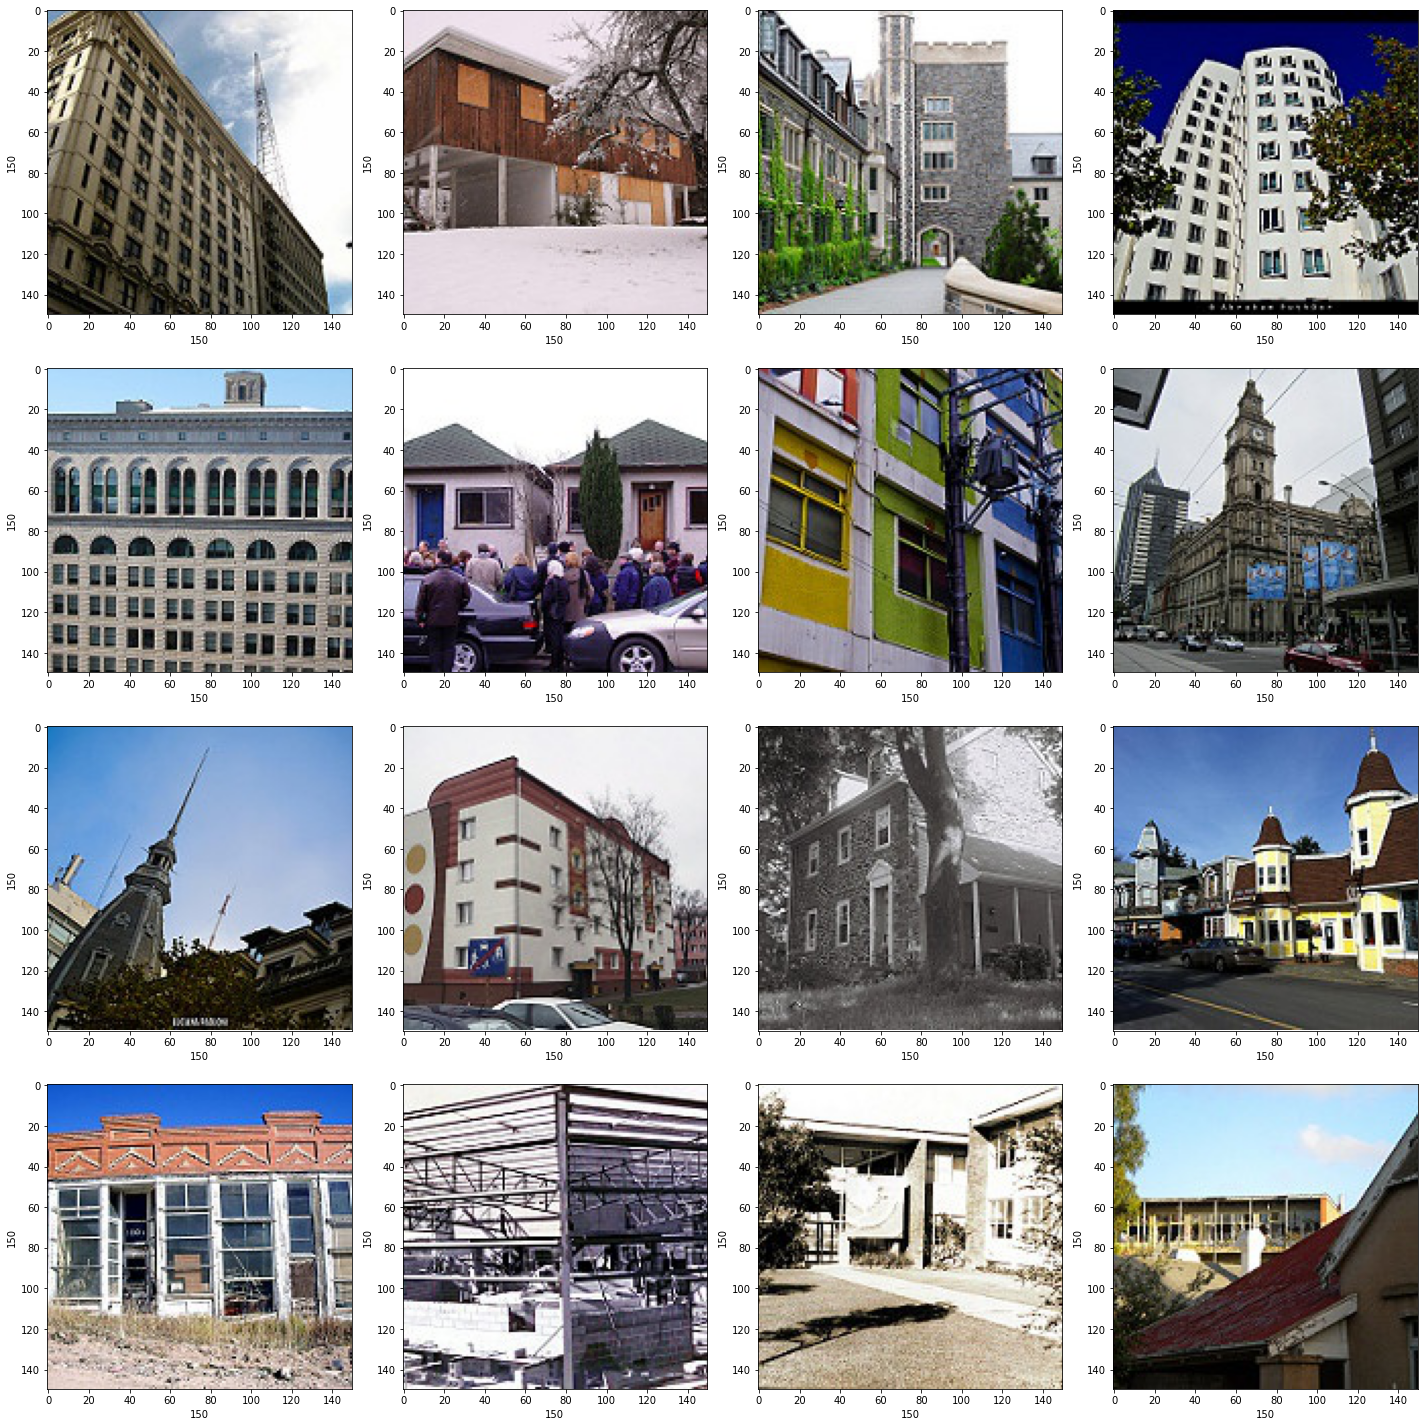

In [2]:
# Plot 12 images
path = "Data/Intel Image Dataset"
dir = os.listdir(path)
path_ = path+'/'+dir[1]

plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path+'/'+dir[1]+'/'+random.choice(sorted(os.listdir(path_))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1])
    plt.ylabel(rand_img.shape[0])

In [3]:
image_list, label_list = [], []

for directory in dir:
    for file in os.listdir(f"{path}/{directory}"):
        img_path = f"{path}/{directory}/{file}"
        img = Image.open(img_path)
        img = img.resize((150,150))
        img = image.img_to_array(img)
        image_list.append(img)
        label_list.append(directory)

In [4]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

glacier      553
mountain     525
sea          510
street       501
forest       474
buildings    437
dtype: int64

In [5]:
label_list = np.array(label_list)
num_classes = len(label_counts)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [7]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 150, 150, 3)
x_test = x_test.reshape(-1, 150, 150, 3)

In [8]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [10]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape= (150,150,3)))
#model.add(batch_normalization())
model.add(LeakyReLU())

model.add(Conv2D(filters=32, kernel_size= (3,3)))
#model.add(batch_normalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(5,5)))

model.add(Conv2D(filters=64, kernel_size= (3,3)))
#model.add(batch_normalization())
model.add(LeakyReLU())

model.add(Conv2D(filters=128, kernel_size= (3,3)))
#model.add(batch_normalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(5,5)))

model.add(Flatten())

model.add(Dense(64))
model.add(Dropout(rate= 0.2))
#model.add(batch_normalization())
model.add(LeakyReLU())

model.add(Dense(32))
model.add(Dropout(rate= 0.2))
#model.add(batch_normalization())
model.add(LeakyReLU())

model.add(Dense(16))
model.add(Dropout(rate= 0.2))
#model.add(batch_normalization())
model.add(LeakyReLU())

model.add(Dense(6, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 27, 27, 64)        0

2021-12-09 15:12:40.785467: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(0.0005), metrics=['accuracy'])

In [12]:
# Tranning the model
epochs = 20
batch_size = 32
history = model.fit(x_train,y_train, batch_size= batch_size, epochs = epochs, validation_data=(x_val, y_val))

2021-12-09 15:12:41.585384: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
60/60 [==============================] - 39s 647ms/step - loss: 1.5980 - accuracy: 0.3135 - val_loss: 1.2511 - val_accuracy: 0.5458
Epoch 2/20
60/60 [==============================] - 40s 671ms/step - loss: 1.3165 - accuracy: 0.4766 - val_loss: 1.0705 - val_accuracy: 0.5771
Epoch 3/20
60/60 [==============================] - 40s 661ms/step - loss: 1.1384 - accuracy: 0.5495 - val_loss: 0.9645 - val_accuracy: 0.6396
Epoch 4/20
60/60 [==============================] - 40s 667ms/step - loss: 1.0486 - accuracy: 0.5865 - val_loss: 0.8904 - val_accuracy: 0.6562
Epoch 5/20
60/60 [==============================] - 41s 678ms/step - loss: 0.9473 - accuracy: 0.6396 - val_loss: 0.8389 - val_accuracy: 0.6750
Epoch 6/20
60/60 [==============================] - 40s 669ms/step - loss: 0.9395 - accuracy: 0.6411 - val_loss: 0.7998 - val_accuracy: 0.7063
Epoch 7/20
60/60 [==============================] - 39s 645ms/step - loss: 0.8085 - accuracy: 0.6875 - val_loss: 0.7810 - val_accuracy: 0.7104

In [13]:
model.save("model.h5")

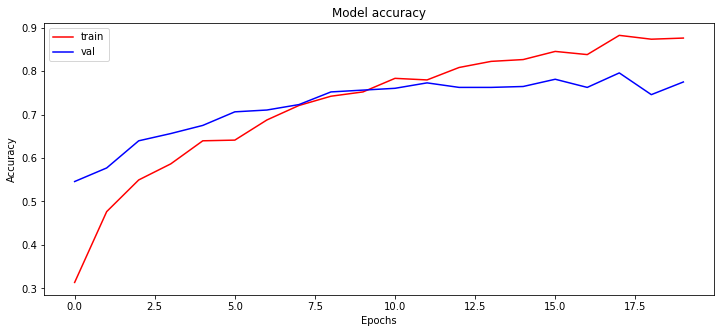

In [14]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.show()

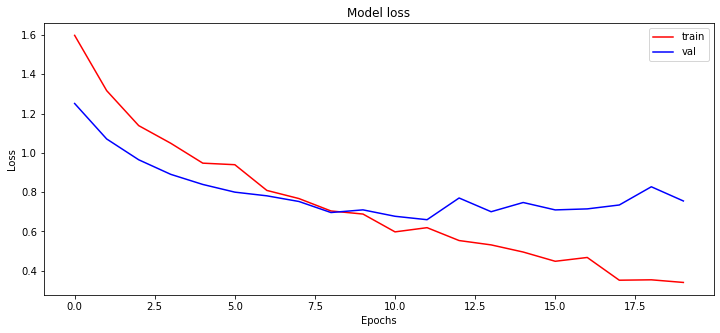

In [15]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.show()

In [16]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

19/19 [==============================] - 4s 202ms/step - loss: 0.7035 - accuracy: 0.7867
Test Accuracy: 78.66666913032532


In [20]:
y_pred = model.predict(x_test)


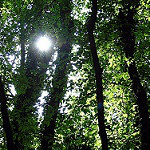

In [21]:
img = image.array_to_img(x_test[1])
img

In [22]:
labels = lb.classes_
print(labels)
print("Originally : ", labels[np.argmax(y_test[1])])
print("Predicted : ", labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  forest
Predicted :  forest
